In [ ]:
# 세션2 2일차

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.font_manager._rebuild()

# from matplotlib import font_manager, rc

from matplotlib import font_manager
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

In [3]:
power_data = pd.read_excel('F:/Python_edu/github/DT_academy/Session2/실습/c9-master/power.xls')
print(power_data.shape)

(19, 28)


In [4]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'], axis=0)
power = power.drop(['업무용합계', '산업용합계', '합계'], axis=1)
power[:5]

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경기,16587710,5533662,33434551,2371347,317263,56603327,2544420,2109963,529274,1917458,...,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]), <a list of 24 Text xticklabel objects>)

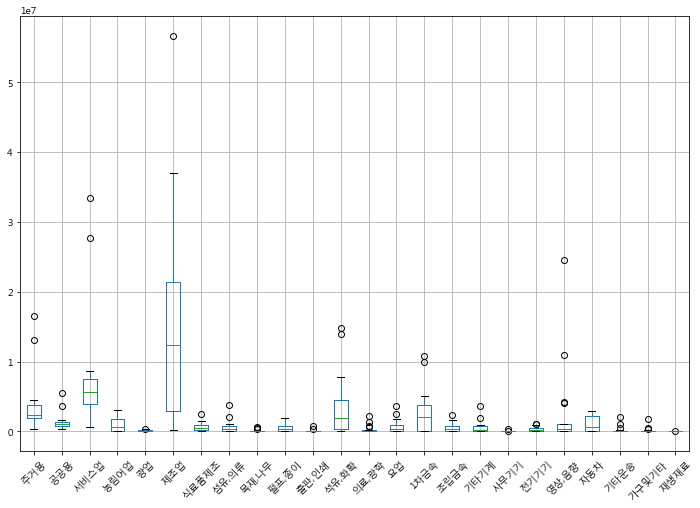

In [5]:
power.boxplot(figsize=(12,8))
plt.xticks(rotation=45)

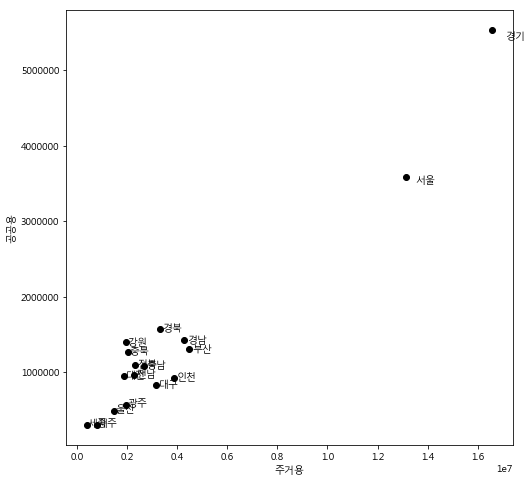

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(power['주거용'], power['공공용'],c='k',marker='o')
plt.xlabel('주거용')
plt.ylabel('공공용')

for n in range(power.shape[0]):
    plt.text(power['주거용'][n]*1.03, power['공공용'][n]*0.98, power.index[n])

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['주거용', '공공용']] = scaler.fit_transform(power[['주거용', '공공용']])
power[['주거용', '공공용']]

,주거용,공공용
구분,,
강원,-0.471562,0.009461
경기,3.031166,3.290437
경남,0.083271,0.031004
경북,-0.145957,0.150515
광주,-0.468228,-0.653279
대구,-0.181962,-0.446201
대전,-0.487834,-0.344368
부산,0.134095,-0.065589
서울,2.204547,1.740834


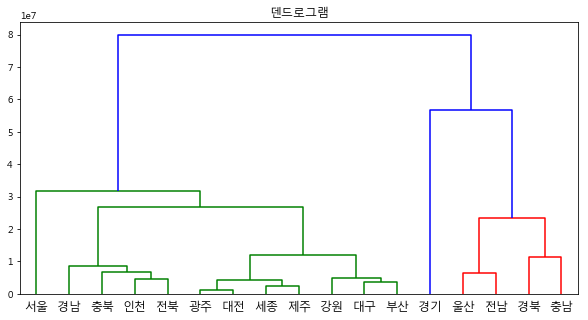

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(power, metric='euclidean', method='ward') 

plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

스케일링

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

(array([  1.,   1.,   0.,   0.,   3.,   1.,   6.,   8.,   9.,  32.,  38.,
         60.,  73., 117., 142., 175., 215., 261., 349., 414., 485., 526.,
        572., 611., 625., 675., 664., 589., 495., 533., 448., 406., 359.,
        258., 239., 175., 126.,  97.,  64.,  64.,  28.,  18.,  14.,   9.,
          9.,   2.,   3.,   0.,   0.,   1.]),
 array([-3.13445969, -2.81221751, -2.48997533, -2.16773315, -1.84549097,
        -1.52324878, -1.2010066 , -0.87876442, -0.55652224, -0.23428005,
         0.08796213,  0.41020431,  0.73244649,  1.05468867,  1.37693086,
         1.69917304,  2.02141522,  2.3436574 ,  2.66589959,  2.98814177,
         3.31038395,  3.63262613,  3.95486831,  4.2771105 ,  4.59935268,
         4.92159486,  5.24383704,  5.56607923,  5.88832141,  6.21056359,
         6.53280577,  6.85504795,  7.17729014,  7.49953232,  7.8217745 ,
         8.14401668,  8.46625887,  8.78850105,  9.11074323,  9.43298541,
         9.75522759, 10.07746978, 10.39971196, 10.72195414, 11.04419632,
 

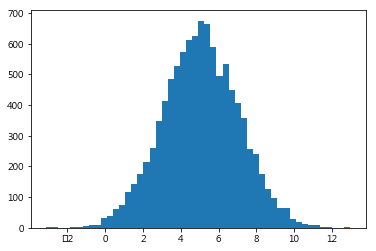

In [16]:
x = np.random.randn(10000) * 2 + 5
plt.hist(x, bins=50)

<function matplotlib.pyplot.show(*args, **kw)>

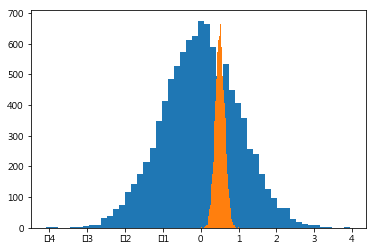

In [18]:
sc = StandardScaler()
x_sc = sc.fit_transform(x.reshape(-1,1))
x_min = MinMaxScaler().fit_transform(x.reshape(-1,1))

plt.hist(x_sc, bins=50)
plt.hist(x_min, bins=50)
plt.show

-- inverse scaling

<function matplotlib.pyplot.show(*args, **kw)>

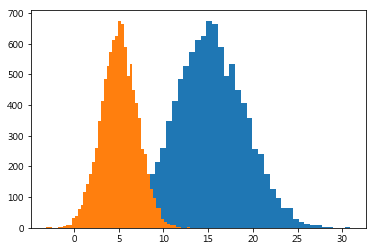

In [20]:
y = x_sc *2 +5

x_new = sc.inverse_transform(y)
plt.hist(x_new, bins=50)
plt.hist(x, bins=50)
plt.show

선형모델

In [59]:
x = np.random.rand(10)
y = 2*x + 1
x, y

(array([0.65445845, 0.39397325, 0.2527604 , 0.69530201, 0.47623358,
        0.65987493, 0.61246866, 0.78513206, 0.34430924, 0.52231678]),
 array([2.30891689, 1.7879465 , 1.5055208 , 2.39060401, 1.95246717,
        2.31974986, 2.22493731, 2.57026412, 1.68861847, 2.04463356]))

In [60]:
w = np.random.rand()
b = np.random.rand()
w, b

(0.4278705752487538, 0.4267836734863937)

In [61]:
epoke = 30
lr = 1

for i in range(epoke):
    y_pred = w*x + b
    e = y_pred - y          #오차
    w = w - lr*(e*x).mean()
    b = b - lr*e.mean()
    print(f'w= {w :.3f} , b= {b :.3f} , error= {e.mean() :.5f}')

w= 1.237 , b= 1.848 , error= -1.42167
w= 1.021 , b= 1.412 , error= 0.43642
w= 1.110 , b= 1.528 , error= -0.11626
w= 1.107 , b= 1.481 , error= 0.04778
w= 1.132 , b= 1.482 , error= -0.00126
w= 1.147 , b= 1.469 , error= 0.01306
w= 1.165 , b= 1.460 , error= 0.00854
w= 1.182 , b= 1.451 , error= 0.00963
w= 1.199 , b= 1.441 , error= 0.00906
w= 1.215 , b= 1.432 , error= 0.00899
w= 1.231 , b= 1.424 , error= 0.00877
w= 1.246 , b= 1.415 , error= 0.00861
w= 1.262 , b= 1.407 , error= 0.00843
w= 1.277 , b= 1.398 , error= 0.00826
w= 1.291 , b= 1.390 , error= 0.00809
w= 1.306 , b= 1.382 , error= 0.00793
w= 1.320 , b= 1.375 , error= 0.00777
w= 1.334 , b= 1.367 , error= 0.00761
w= 1.347 , b= 1.360 , error= 0.00745
w= 1.361 , b= 1.352 , error= 0.00730
w= 1.374 , b= 1.345 , error= 0.00715
w= 1.386 , b= 1.338 , error= 0.00701
w= 1.399 , b= 1.331 , error= 0.00687
w= 1.411 , b= 1.325 , error= 0.00673
w= 1.423 , b= 1.318 , error= 0.00659
w= 1.435 , b= 1.311 , error= 0.00646
w= 1.446 , b= 1.305 , error= 0.0063

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
x1 = x.reshape(-1, 1)

In [64]:
lin = LinearRegression()
lin.fit(x1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lin.coef_, lin.intercept_

(array([2.]), 1.0000000000000007)

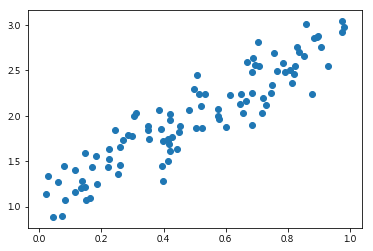

In [71]:
x = np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)*0.2
x, y
plt.scatter(x, y)

In [72]:
lin = LinearRegression()
lin.fit(x.reshape(-1, 1), y)
lin.coef_, lin.intercept_

(array([1.84578695]), 1.0680623106024763)